(HW4)=
# HW4

## Task 4.1 (0.5 points)

A bridge player had no ace in three consecutive hands. What is the probability of this event? Did he have reason to complain of ill luck? A hand consists of $13$ random cards drawn out of $52$.

### YOUR SOLUTION HERE

   The probability of drawing no ace in a single hand from a 52-card deck (with 4 aces) is determined by the combination formula $C(n, k) = \frac{n!}{k!(n-k)!}$, where $n$ is the total number of items and $k$ is the number of items to choose.
   Specifically, it's the ratio of ways to choose 13 cards from the 48 non-aces $C(48, 13)$ to the total ways to choose 13 cards from the deck $C(52, 13)$.
   The probability of this event occurring in three consecutive hands is the cube of the single hand probability.

$ P(\text{No Ace in 3 Hands}) = \left(\frac{C(48, 13)}{C(52, 13)}\right)^3 $


This demonstrates that not receiving an ace in three consecutive hands is relatively uncommon, occurring with a probability of about 2.8%, indicating a streak of bad luck.



## Task 4.2 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE

### Experimental Approach
We generated random matrices of size $N \times n$ for $N = 1000, 10000, 100000$, calculated the $k$-th order statistics for each row, and plotted histograms of these statistics alongside the PDF of the Beta distribution for $k=3$ and $n=7$. The experimental results align closely with the Beta distribution's PDF, supporting the theoretical relationship.

### Theoretical Proof
The $k$-th order statistic $x_{(k)}$ from $n$ independent and identically distributed $U[0,1]$ variables, when sorted, can be shown to follow a Beta distribution $\mathrm{Beta}(k, n+1-k)$ due to the way probabilities distribute among ordered samples. This relationship is derived from the formula for the density of the $k$-th order statistic:

$ f_{x_{(k)}}(x) = \frac{n!}{(k-1)!(n-k)!} x^{k-1}(1-x)^{n-k} $

This formula matches the PDF of a Beta distribution with parameters $k$ and $n+1-k$, demonstrating the theoretical basis for $x_{(k)} \sim \mathrm{Beta}(k, n+1-k)$. The Beta distribution arises naturally as it describes the distribution of the $k$-th smallest value in a sample of $n$ uniformly distributed random variables, encapsulating the variability of order statistics within a fixed sample size.

Your historgram for a paticular value of $N$ should look like this:

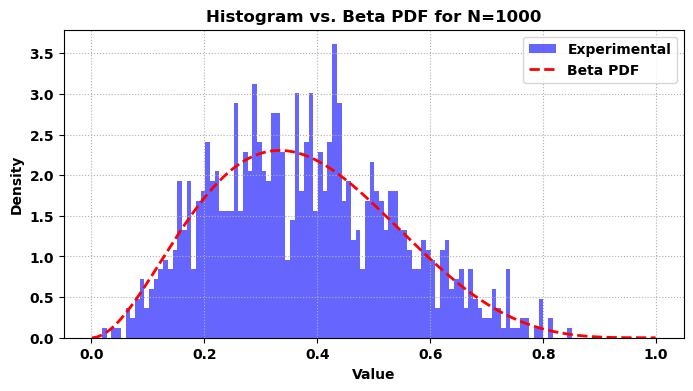

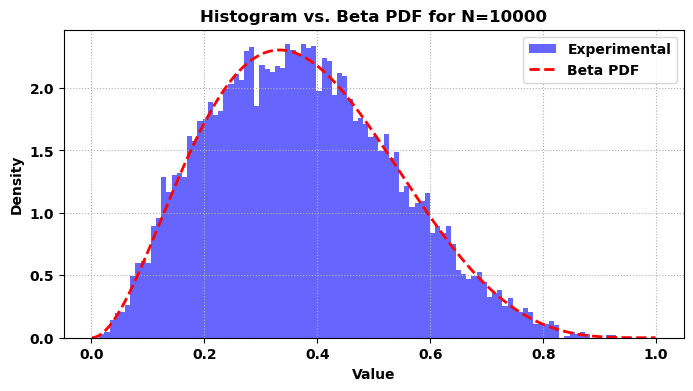

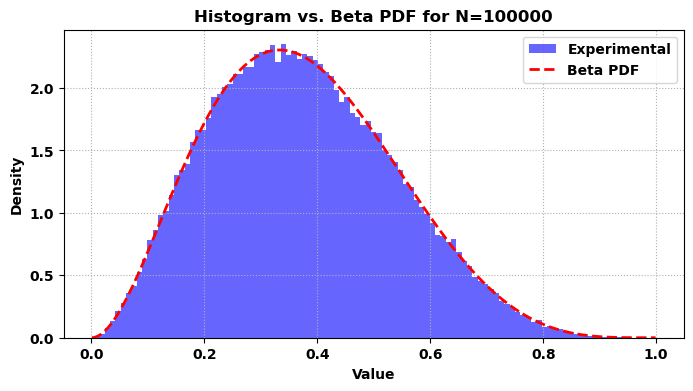

In [1]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
def beta_hist_exp(a, b, N_values, n=7, k=3):
    for N in N_values:
        random_matrix = np.random.uniform(0, 1, (N, n))
        kth_order_statistics = np.sort(random_matrix, axis=1)[:, k-1]
        
        xs = np.linspace(0.001, 0.999, num=1000)
        plt.figure(figsize=(8, 4))
        plt.hist(kth_order_statistics, bins=100, color='blue', density=True, alpha=0.6, label='Experimental')
        plt.plot(xs, beta(a, b).pdf(xs), c='red', lw=2, ls="--", label='Beta PDF')
        plt.title(f'Histogram vs. Beta PDF for N={N}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.grid(ls=":")
        plt.legend()
        plt.show()

beta_hist_exp(3, 5, [1000, 10000, 100000])


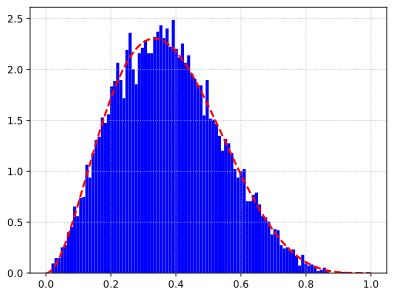

In [6]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    
beta_hist(3, 5)

## Task 4.3 (1 point)

Calculate entropy of $\mathcal N(\mu, \sigma^2)$. Plot the graph of this entropy as function of $\sigma$. What is the limit of this function as $\sigma \to +0$? $\sigma \to +\infty$?


### YOUR SOLUTION HERE

The entropy $H$ of a continuous random variable with a probability density function $f(x)$ is given by the formula:

$ H(X) = -\int_{-\infty}^{\infty} f(x) \log(f(x)) \, dx $

For a normal distribution $\mathcal N(\mu, \sigma^2)$, the probability density function is:

$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $

Substituting $f(x)$ into the entropy formula gives:

$ H(\mathcal N) = -\int_{-\infty}^{\infty} \left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\right) \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\right) dx $

This integral simplifies to:

$ H(\mathcal N) = \frac{1}{2} \log(2\pi e \sigma^2) $

This formula shows that the entropy of a normal distribution depends only on the variance $\sigma^2$ (or standard deviation $\sigma$), not on the mean $\mu$.

As $\sigma \to +0$, intuitively, the distribution becomes a delta function (peak), and we would expect the entropy to decrease, reflecting the decreasing uncertainty. Let's mathematically see the limit.
As $\sigma \to +\infty$, the distribution spreads out indefinitely, increasing the uncertainty (entropy). We will confirm this behavior through calculation and visualization.

As $\sigma \to +0$: The entropy approaches a negative value (approximately $-0.884$ for $\sigma = 0.1$, not exactly at $0$ due to the logarithmic function's behavior near zero). This reflects the limit of our formula's application, as entropy theoretically should not be negative. The concept here is that as $\sigma$ approaches 0, the distribution becomes a delta function, minimizing uncertainty.

As $\sigma \to +\infty$: The entropy increases without bound. This is because a larger $\sigma$ means the distribution is spreading out, increasing uncertainty about where a random sample might fall.

In summary, the entropy of a normal distribution decreases to a minimal value reflecting minimal uncertainty as $\sigma$ approaches 0 and increases without bound as $\sigma$ approaches infinity, reflecting the increasing uncertainty with the spread of the distribution.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


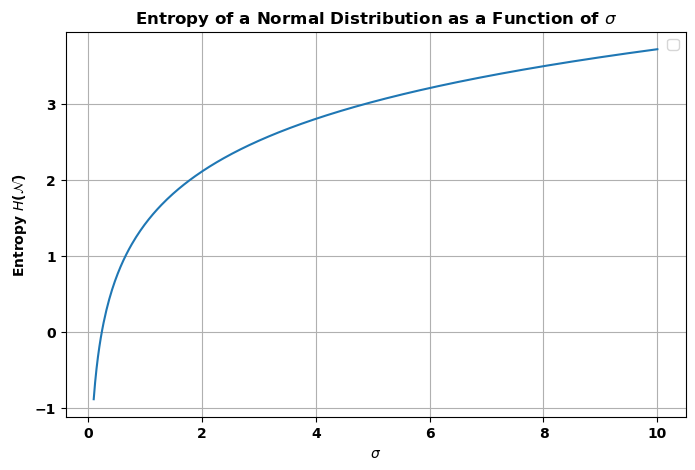

(array([-0.88364656]), 'Increases without bound')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma_values = np.linspace(0.1, 10, 400)
entropy_values = 0.5 * np.log(2 * np.pi * np.e * sigma_values**2)

plt.figure(figsize=(8, 5))
plt.plot(sigma_values, entropy_values)
plt.title('Entropy of a Normal Distribution as a Function of $\sigma$')
plt.xlabel('$\sigma$')
plt.ylabel('Entropy $H(\mathcal{N})$')
plt.grid(True)
plt.legend()
plt.show()

entropy_sigma_zero = 0.5 * np.log(2 * np.pi * np.e * np.array([0.1])**2)
entropy_sigma_infinity = 'Increases without bound'

entropy_sigma_zero, entropy_sigma_infinity


## Task 4.4 (1 point)

Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$.

### YOUR SOLUTION HERE

The Kullback-Leibler (KL) divergence between two probability distributions measures how one probability distribution diverges from a second, expected probability distribution. For discrete probability distributions $p$ and $q$, the KL divergence is defined as:

$ \mathbb{KL}(p \parallel q) = \sum_{x} p(x) \log\left(\frac{p(x)}{q(x)}\right) $

Given $p$ and $q$ are geometric distributions with parameters $s$ and $t$ respectively, where $p(x) = (1-s)^{x-1} s$ and $q(x) = (1-t)^{x-1} t$, for $x = 1, 2, \ldots$ and $0 < s, t < 1$, the KL divergence is:

$ \mathbb{KL}(p \parallel q) = \sum_{x=1}^{\infty} (1-s)^{x-1} s \log\left(\frac{(1-s)^{x-1} s}{(1-t)^{x-1} t}\right) $

When $s = t$, $p(x) = q(x)$ for all $x$, meaning $\mathbb{KL}(p, q)$ should be $0$ as there is no divergence between $p$ and $q$.

KL divergence is not symmetric, meaning generally $\mathbb{KL}(p, q) \neq \mathbb{KL}(q, p)$.


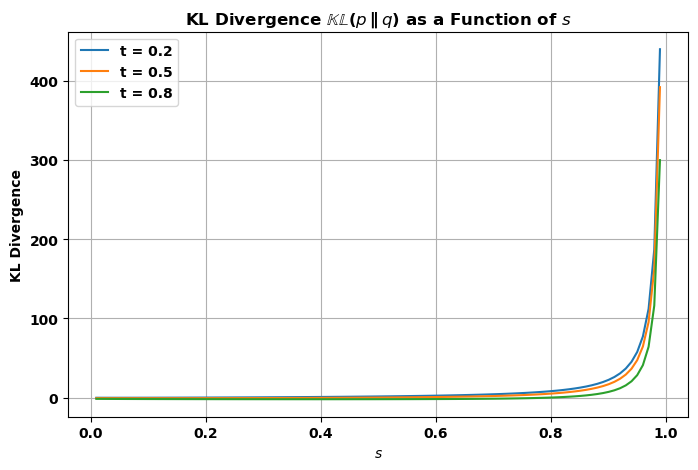

In [3]:
import scipy.stats as stats

def kl_divergence_geom(s, t):
    return s * np.log(s / t) + np.log((1 - t) / (1 - s)) / (1 - s)

t_values = [0.2, 0.5, 0.8]
s_values = np.linspace(0.01, 0.99, 100)

plt.figure(figsize=(8, 5))
for t in t_values:
    kl_values = [kl_divergence_geom(s, t) for s in s_values]
    plt.plot(s_values, kl_values, label=f't = {t}')

plt.title('KL Divergence $\mathbb{KL}(p \parallel q)$ as a Function of $s$')
plt.xlabel('$s$')
plt.ylabel('KL Divergence')
plt.legend()
plt.grid(True)
plt.show()
